## Follows notebook from [Alberto Maria Falletta on Kaggle](https://www.kaggle.com/albeffe/text-clustering-tfidf-pca-beginner-tutorial)

In [1]:
import csv
import os
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from mlxtend.frequent_patterns import fpgrowth
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

import json

In [2]:
data_path = 'C:\\Users\\Meehir\\Documents\\GitHub\\project-4-public\\data\\'

#### **Get corpus**

In [3]:
with open(data_path + 'json_files\\combined_2000.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

comms = []

for thread in data:
    for comment in thread['comments']:
        comms.append(comment['comment'])
        
corpus = comms

#### **Get stop words**

In [4]:
with open(data_path + "csv_files\\my_stop_words.csv") as f:
        reader = csv.reader(f)
        data = list(reader)
        
flattened_list = [y for x in data for y in x]
my_stop_words = set(flattened_list)

In [5]:
class LemmaTokenizer(object):

    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def __call__(self, document):
        lemmas = []
        
        # Pre-proccessing of one document at the time
        
        # Removing puntuation
        translator_1 = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
        document = document.translate(translator_1)

        # Removing numbers
        document = re.sub(r'\d+', ' ', document)

        # Removing special characters
        document = re.sub(r"[^a-zA-Z0-9]+", ' ', document)

        # The document is a string up to now, after word_tokenize(document) we'll work on every word one at the time
        for token in word_tokenize(document):
            
            # Removing spaces
            token = token.strip()
            
            # Lemmatizing
            token = self.lemmatizer.lemmatize(token)
            
            # Removing stopwords
            if token not in stopwords and len(token) > 2:
                lemmas.append(token)
        return lemmas

In [6]:
def __init__(self):
    self.lemmatizer = WordNetLemmatizer()

def __call__(self, document):
    lemmas = []

    # Pre-proccessing of one document at the time

    # Removing puntuation
    translator_1 = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    document = document.translate(translator_1)

    # Removing numbers
    document = re.sub(r'\d+', ' ', document)

    # Removing special characters
    document = re.sub(r"[^a-zA-Z0-9]+", ' ', document)

    # The document is a string up to now, after word_tokenize(document) we'll work on every word one at the time
    for token in word_tokenize(document):

        # Removing spaces
        token = token.strip()

        # Lemmatizing
        token = self.lemmatizer.lemmatize(token)

        # Removing stopwords
        if token not in stopwords and len(token) > 2:
            lemmas.append(token)
    return lemmas

In [7]:
def generate_wordclouds(X, in_X_tfidf, k, in_word_positions):

    # Clustering
    in_model = KMeans(n_clusters=k, random_state=42, n_jobs=-1)
    in_y_pred = in_model.fit_predict(X)
    in_cluster_ids = set(in_y_pred)
    silhouette_avg = silhouette_score(X, in_y_pred)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

    # Number of words with highest tfidf score to display
    top_count = 100

    for in_cluster_id in in_cluster_ids:
        # compute the total tfidf for each term in the cluster
        in_tfidf = in_X_tfidf[in_y_pred == in_cluster_id]
        # numpy.matrix
        tfidf_sum = np.sum(in_tfidf, axis=0)
        # numpy.array of shape (1, X.shape[1])
        tfidf_sum = np.asarray(tfidf_sum).reshape(-1)
        top_indices = tfidf_sum.argsort()[-top_count:]
        term_weights = {in_word_positions[in_idx]: tfidf_sum[in_idx] for in_idx in top_indices}
        wc = WordCloud(width=1200, height=800, background_color="white")
        wordcloud = wc.generate_from_frequencies(term_weights)
        fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis("off")
        fig.suptitle(f"Cluster {in_cluster_id}")
        plt.show()

    return in_cluster_ids


def custom_import_stopwords(filename):
    in_stopword_list = []
    in_flag = 0
    in_word_cnt = 0

    with open(filename, encoding="utf8") as f:
        for row in csv.reader(f):
            if in_flag == 0:
                in_flag = 1
            else:
                in_stopword_list.append(row[0])
                in_word_cnt += 1

    print(f"{in_word_cnt} stopwords imported")
    return in_stopword_list

In [8]:
stopwords = my_stop_words
# Custom tokenizer for tfidf representation
vectorizer = TfidfVectorizer(input=corpus, tokenizer=LemmaTokenizer())

# Here we need the correct path in order to give it to the vectorizer
print("Generating TFIDF sparse matrix...")
X_tfidf = vectorizer.fit_transform(corpus)

Generating TFIDF sparse matrix...


In [9]:
# Dimensionality reduction
svd = TruncatedSVD(n_components=30, random_state=42)
X_svd = svd.fit_transform(X_tfidf)
print(f"Total variance explained: {np.sum(svd.explained_variance_ratio_):.2f}")
# The variance explained is quite low for real applications. We will investigate it later.


Total variance explained: 0.12


In [10]:
word_positions = {v: k for k, v in vectorizer.vocabulary_.items()}

C:\Users\Meehir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 7 The average silhouette_score is : 0.13813558958368172


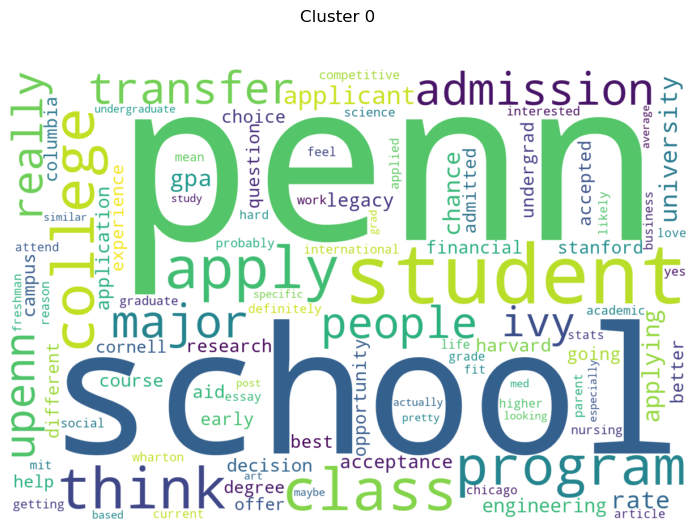

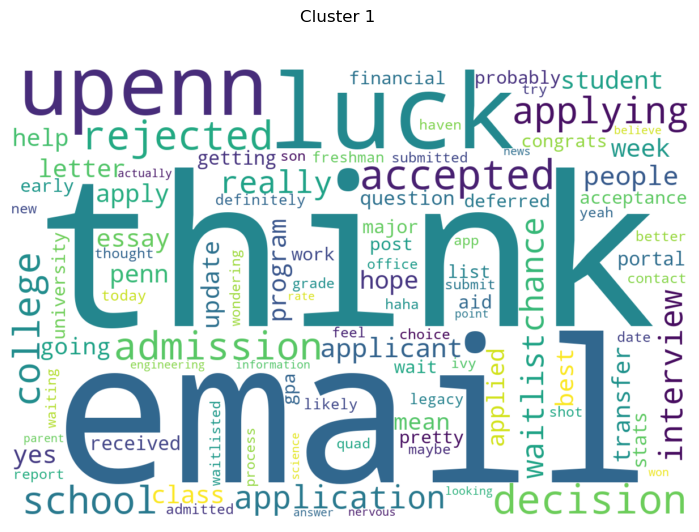

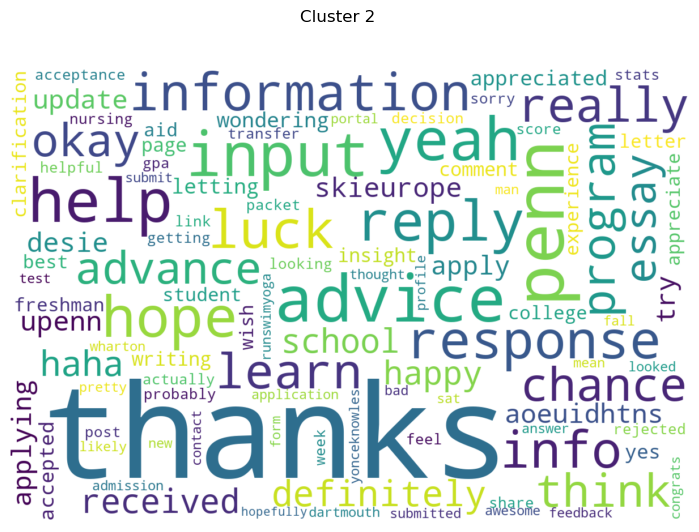

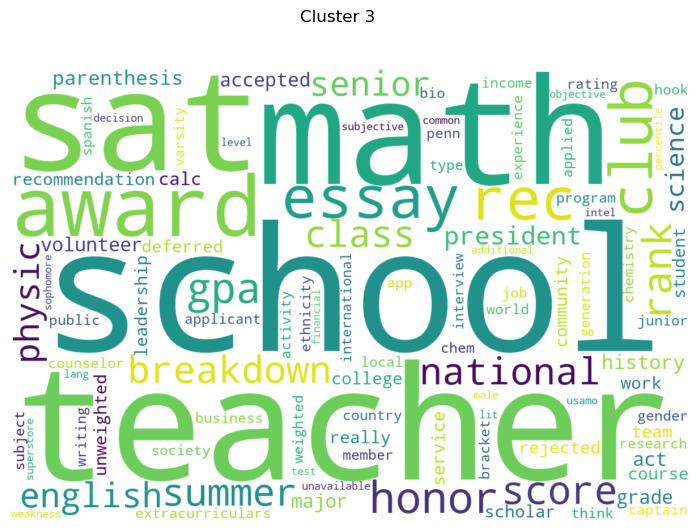

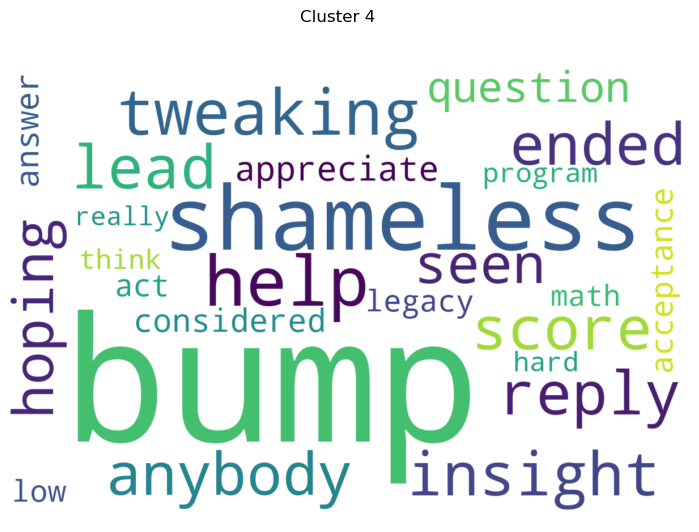

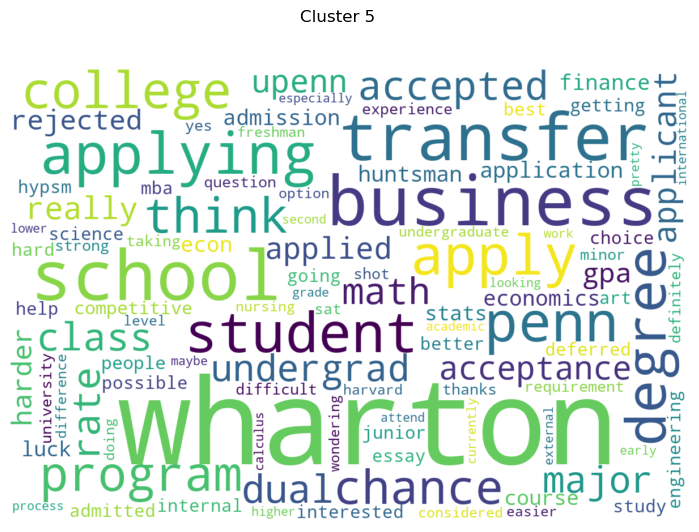

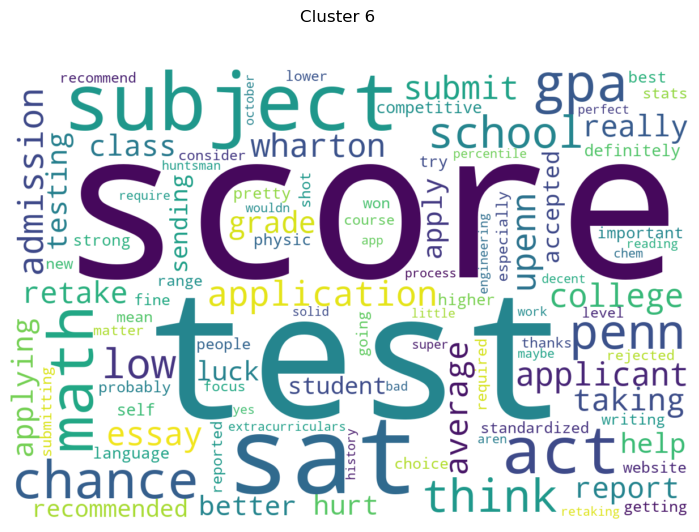

In [11]:
# using 7 clusters as determined by elbow method
cluster_ids = generate_wordclouds(X_svd, X_tfidf, 7, word_positions)

In [ ]:
model = KMeans(n_clusters=7, random_state=42, n_jobs=-1)
y_pred = model.fit_predict(X_svd)
cluster_ids = set(y_pred)

min_support = 0.3
dist_words = sorted(v for k, v in word_positions.items()) # distinct words in the vocabulary
for cluster_id in cluster_ids:
    print(f"FP-Growth results on Cluster {cluster_id} with min support {min_support}")
    tfidf = X_tfidf[y_pred == cluster_id]
    # encoded as binary "presence/absence" representation as required by mlxtend
    tfidf[tfidf > 0] = 1
    # df is a pandas sparse dataframe
    df = pd.DataFrame.sparse.from_spmatrix(tfidf, columns=dist_words)
    fset = fpgrowth(df, min_support=min_support, use_colnames=True).sort_values(by='support', ascending=False)
    print(fset, '\n')

C:\Users\Meehir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


FP-Growth results on Cluster 0 with min support 0.3
    support         itemsets
1  0.860458           (penn)
0  0.544531         (school)
3  0.424717   (penn, school)
2  0.401509        (student)
4  0.331593  (penn, student) 

FP-Growth results on Cluster 1 with min support 0.3
Empty DataFrame
Columns: [support, itemsets]
Index: [] 

FP-Growth results on Cluster 2 with min support 0.3
   support  itemsets
0      1.0  (thanks) 

FP-Growth results on Cluster 3 with min support 0.3


In [ ]:
svd = TruncatedSVD(n_components=2000, random_state=42)
X_svd = svd.fit_transform(X_tfidf)

cum_variance = np.cumsum(svd.explained_variance_ratio_)
idx = np.argmax(cum_variance > .8)
svd = TruncatedSVD(n_components=idx, random_state=42)
X_svd = svd.fit_transform(X_tfidf)
_ = generate_wordclouds(X_svd, X_tfidf, 4, word_positions)